In [15]:
import torch
import os
import sys
import yaml
from utils import plot_loss, compute_test_metrics
os.chdir("/Users/anarivera/Documents/Projects/ai-accelerating-uc") # TODO: fix this later
from src.models.simple_mlp import SimpleMLP
from src.datasets.simple_dataset import SimpleDataset
from torch.utils.data import Subset, DataLoader

In [16]:
results_dir = "results/simple_no_round/20251114_104110"

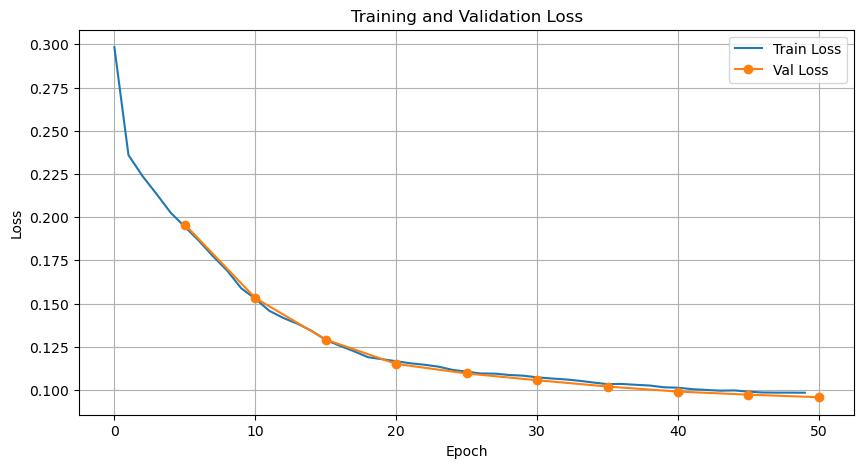

In [17]:
# Plot training loss and validation loss
losses = torch.load(os.path.join(results_dir, "losses.pt"))
plot_loss(losses["train_losses"], losses["val_losses"])

In [ ]:
# Set up test dataloader
test_indices = torch.load(os.path.join(results_dir, "test_indices.pt"))
full_dataset = SimpleDataset(data_dir = "data/starting_kit/Train_Data")
test_dataset = Subset(full_dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [20]:
# Load the saved model
model = torch.load(os.path.join(results_dir, "simple_mlp_model.pt"), weights_only=False)
test_metrics = compute_test_metrics(model, test_loader)

In [21]:
test_metrics

{'precision': 0.7859776463173423,
 'recall': 0.7890454503774554,
 'f1_score': 0.7875085556382945}